In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [14]:
auto_df = fetch_openml(name="auto_price", version=1, as_frame=True)

In [15]:
auto_df.data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.4,10.0,102.0,5500.0,24.0,30.0
1,2,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.4,8.0,115.0,5500.0,18.0,22.0
2,1,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.4,8.5,110.0,5500.0,19.0,25.0
3,1,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.4,8.3,140.0,5500.0,17.0,20.0
4,2,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.8,8.8,101.0,5800.0,23.0,29.0


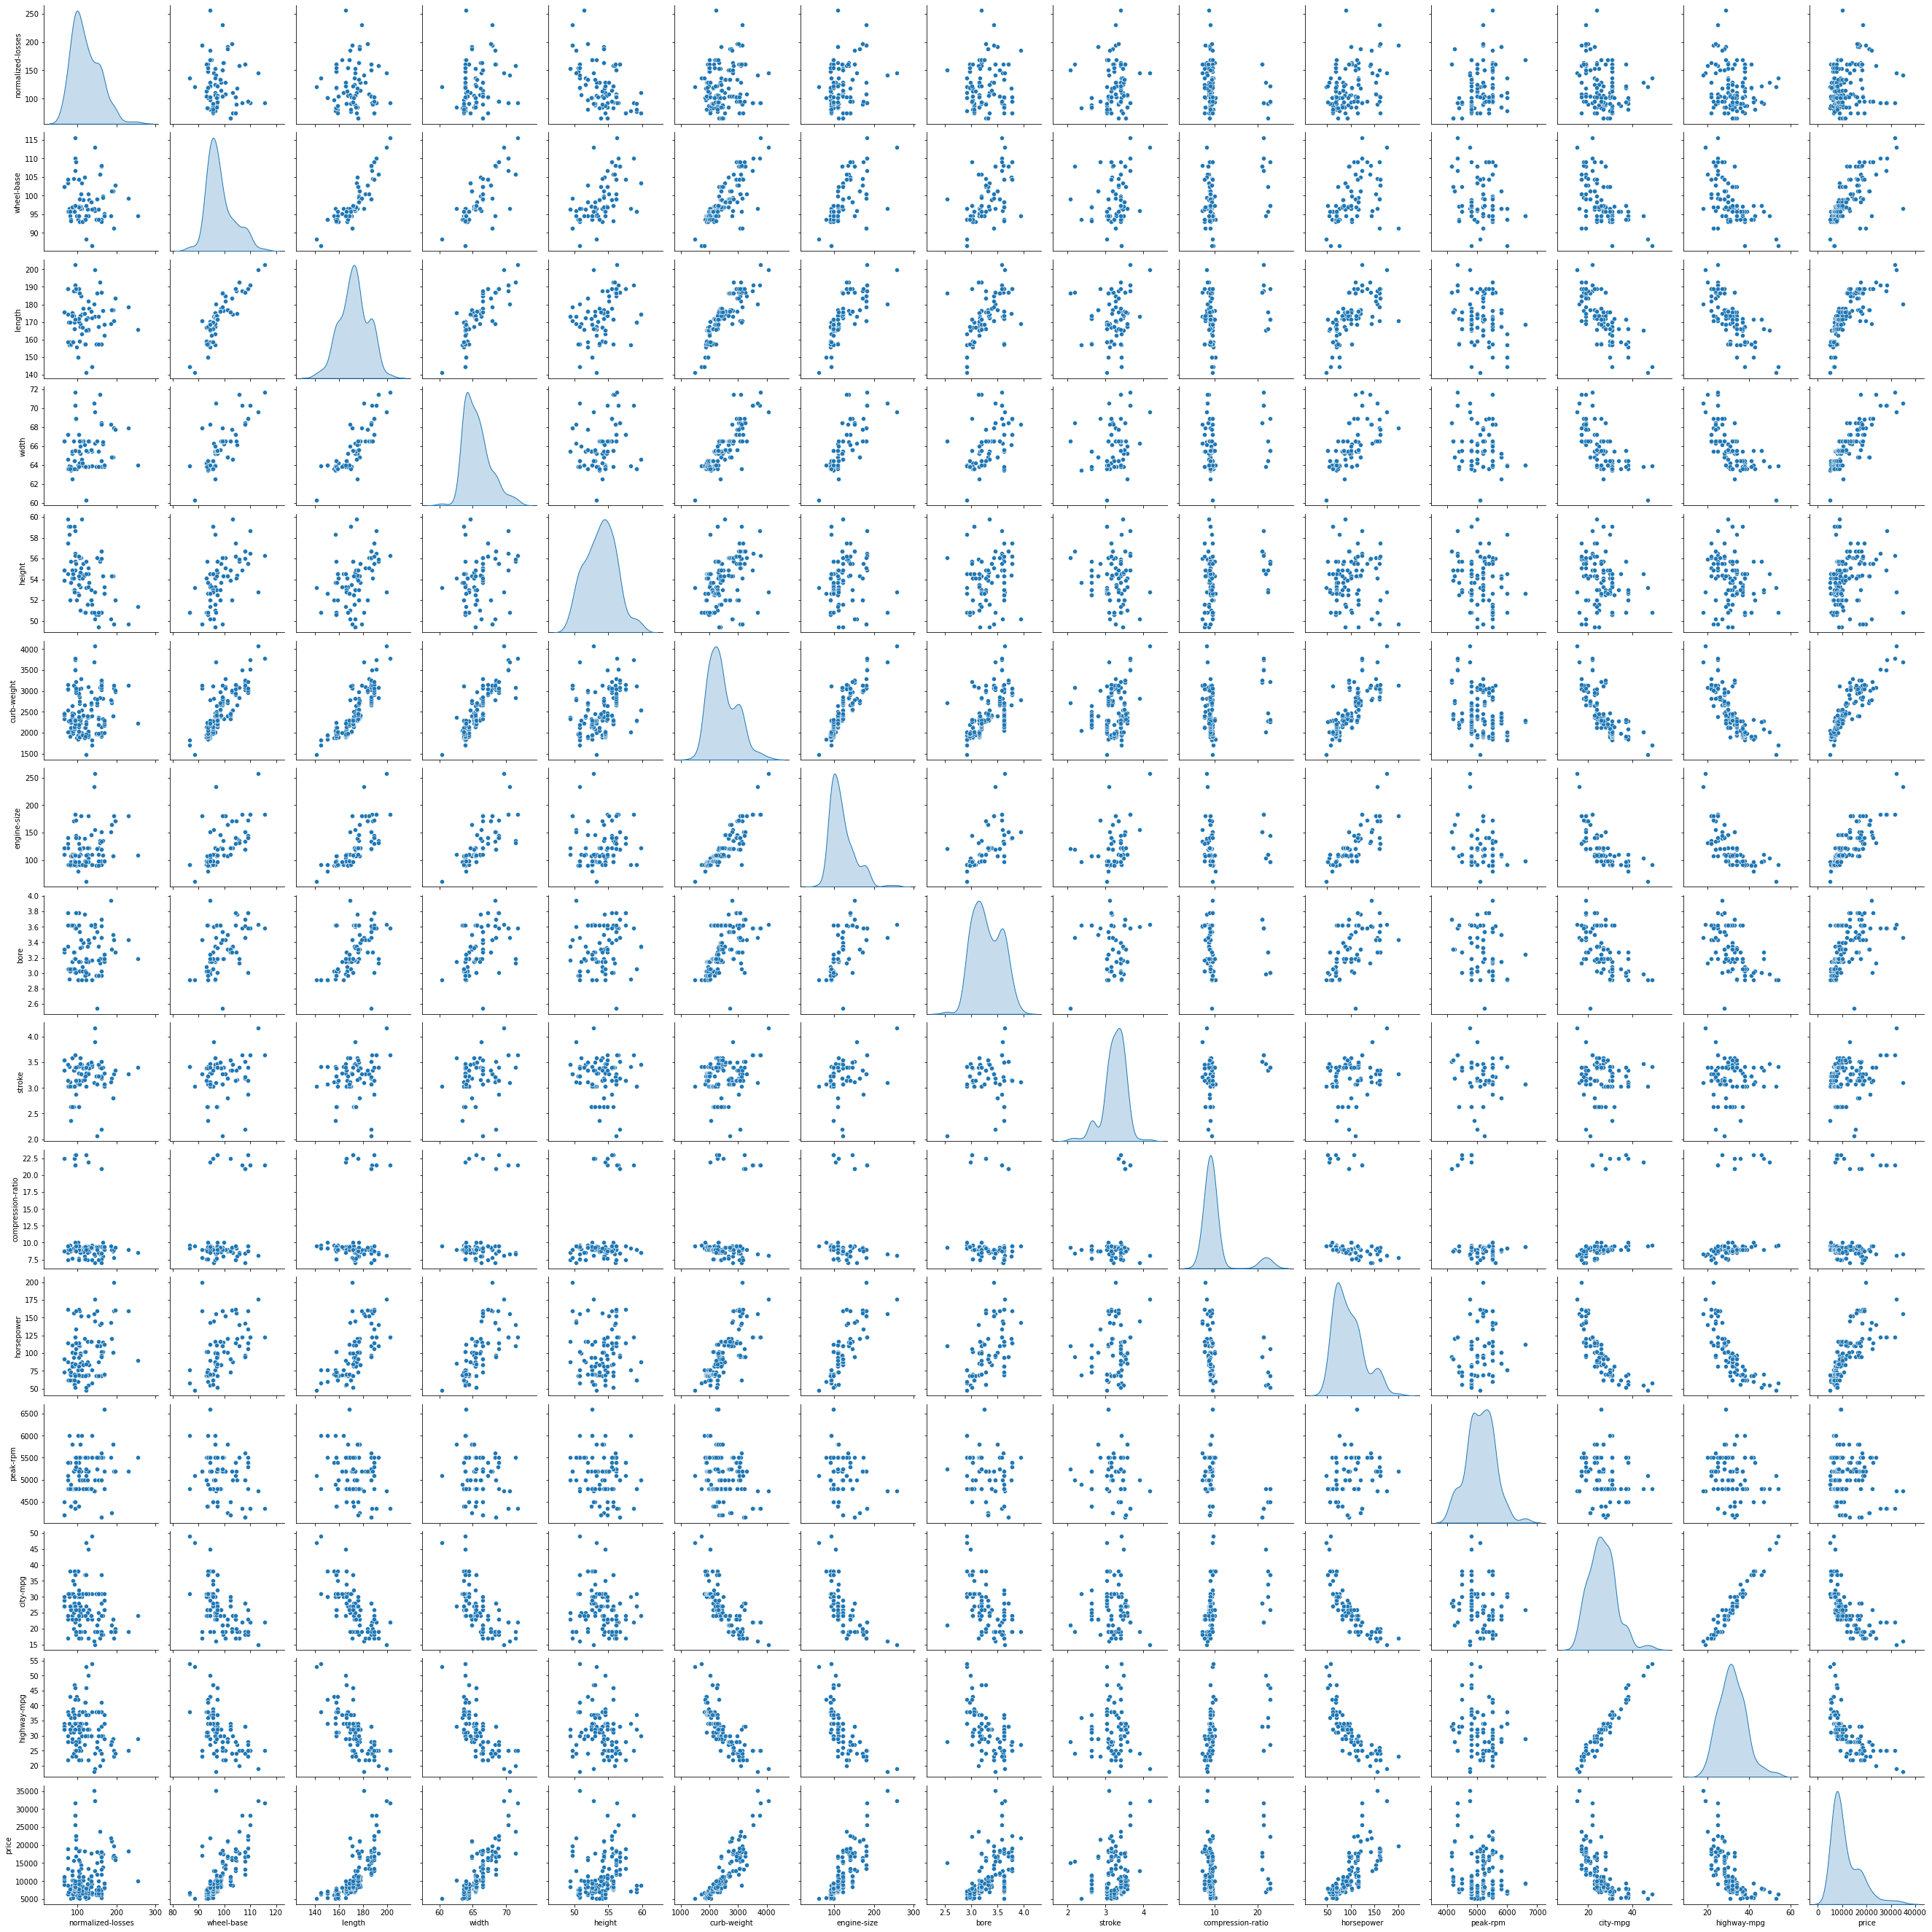

In [16]:
import seaborn as sns
auto_df_plot = auto_df.data.copy()
auto_df_plot['price'] = auto_df.target

sns.pairplot(auto_df_plot, diag_kind="kde")

<AxesSubplot:>

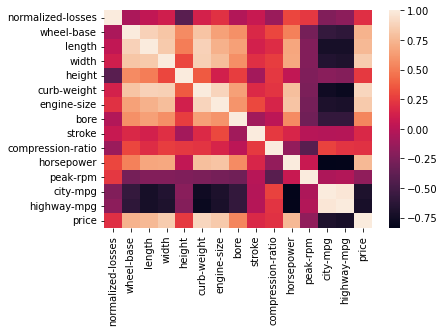

In [17]:
sns.heatmap(data=auto_df_plot.corr())

In [18]:
print(auto_df.target.isna().sum())
print(auto_df.target.isnull().sum())

0
0


In [19]:
print(auto_df.data.isna().sum().any())
print(auto_df.data.isnull().sum().any())

False
False


In [20]:
np.mean(auto_df.target)

11445.729559748428

In [21]:
np.std(auto_df.target)

5859.343216339357

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(auto_df.data, auto_df.target, shuffle=True)

In [23]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_processed = standard_scaler.fit_transform(X_train, y_train)

In [24]:
from sklearn.linear_model import LassoCV

lasso_clf = LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=10000)
lasso_clf.fit(X_train_processed, y_train)

LassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
        max_iter=10000)

In [25]:
X_test_processed = standard_scaler.transform(X_test)
y_test_hat_lasso = lasso_clf.predict(X_test_processed)

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_hat_lasso)

2268.20970973168

In [27]:
from sklearn.linear_model import RidgeCV
ridge_clf = RidgeCV(alphas=np.logspace(-10, 10, 21))
ridge_clf.fit(X_train_processed, y_train)
y_test_hat_ridge = ridge_clf.predict(X_test_processed)
mean_absolute_error(y_test, y_test_hat_ridge)

2161.498980954947

<AxesSubplot:>

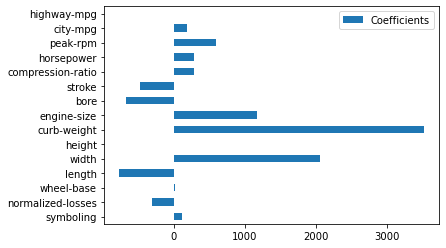

In [28]:
feature_names = list(auto_df.feature_names)
coefficients_lasso = pd.DataFrame(data=lasso_clf.coef_, index=feature_names, columns=["Coefficients"])
coefficients_lasso.plot(kind="barh")

<AxesSubplot:>

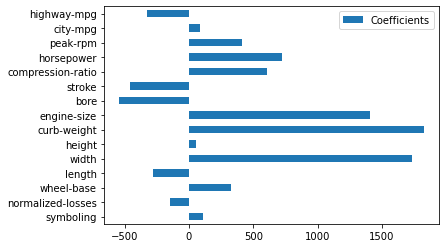

In [29]:
coefficients_ridge = pd.DataFrame(data=ridge_clf.coef_, index=feature_names, columns=["Coefficients"])
coefficients_ridge.plot(kind="barh")

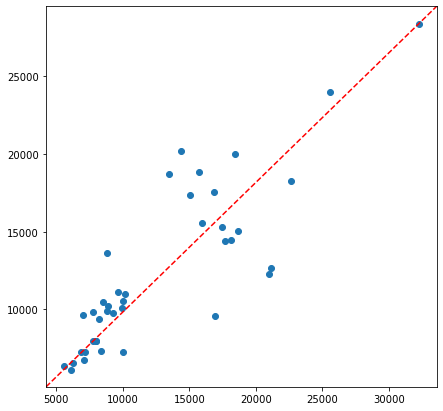

In [33]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_test, y_test_hat_lasso)
ax.plot([0,1],[0,1], transform=ax.transAxes, ls="--", c="red")